# Handling Mixed Data in Machine Learning

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [4]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

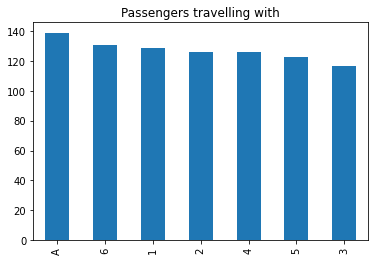

In [5]:
import matplotlib.pylab as plt
fig = df['number'].value_counts().plot.bar()
fig.set_title('Passengers travelling with')
plt.show()

# Extract numerical part and Catagorical part

In [6]:
df['number_numerical'] = pd.to_numeric(df["number"],errors='coerce',downcast='integer')

df['number_categorical'] = np.where(df['number_numerical'].isnull(),df['number'],np.nan)

df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [7]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [8]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [9]:
df['cabin_num'] = df['Cabin'].str.extract('(\d+)') # captures numerical part
df['cabin_cat'] = df['Cabin'].str[0] # captures the first letter

df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN


<AxesSubplot:>

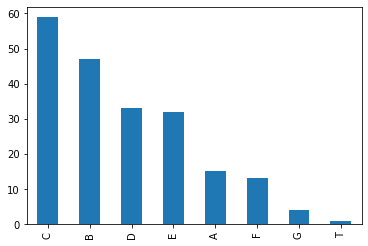

In [10]:
df['cabin_cat'].value_counts().plot(kind='bar')

In [11]:
# extract the last bit of ticket as number
df['ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'],
                                   errors='coerce',
                                   downcast='integer')

# extract the first part of ticket as category
df['ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan,
                              df['ticket_cat'])

df.head(20)

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN
5,NaN,330877,2,0,2.0,NaN,NaN,NaN,330877.0,NaN
6,E46,17463,2,0,2.0,NaN,46,E,17463.0,NaN
7,NaN,349909,5,0,5.0,NaN,NaN,NaN,349909.0,NaN
8,NaN,347742,1,1,1.0,NaN,NaN,NaN,347742.0,NaN
9,NaN,237736,A,1,NaN,A,NaN,NaN,237736.0,NaN


In [12]:
df['ticket_cat'].unique()

array(['A/5', 'PC', 'STON/O2.', nan, 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)

In [13]:
df['ticket_num'].unique()

array([2.117100e+04, 1.759900e+04, 3.101282e+06, 1.138030e+05,
       3.734500e+05, 3.308770e+05, 1.746300e+04, 3.499090e+05,
       3.477420e+05, 2.377360e+05, 9.549000e+03, 1.137830e+05,
       2.151000e+03, 3.470820e+05, 3.504060e+05, 2.487060e+05,
       3.826520e+05, 2.443730e+05, 3.457630e+05, 2.649000e+03,
       2.398650e+05, 2.486980e+05, 3.309230e+05, 1.137880e+05,
       3.470770e+05, 2.631000e+03, 1.995000e+04, 3.309590e+05,
       3.492160e+05, 1.760100e+04, 1.756900e+04, 3.356770e+05,
       2.457900e+04, 1.760400e+04, 1.137890e+05, 2.677000e+03,
       2.152000e+03, 3.457640e+05, 2.651000e+03, 7.546000e+03,
       1.166800e+04, 3.492530e+05, 2.123000e+03, 3.309580e+05,
       2.356700e+04, 3.703710e+05, 1.431100e+04, 2.662000e+03,
       3.492370e+05, 3.101295e+06, 3.988600e+04, 1.757200e+04,
       2.926000e+03, 1.135090e+05, 1.994700e+04, 3.102600e+04,
       2.697000e+03, 3.465100e+04, 2.144000e+03, 2.669000e+03,
       1.135720e+05, 3.697300e+04, 3.470880e+05, 1.7605

# <><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>

# Handling Date and Time variable in Machine Learning

In [14]:
import numpy as np
import pandas as pd

In [15]:
date = pd.read_csv('orders.csv')
time = pd.read_csv('messages.csv')

In [16]:
date.head()

,date,product_id,city_id,orders
0,2019-12-10,5628,25,3
1,2018-08-15,3646,14,157
2,2018-10-23,1859,25,1
3,2019-08-17,7292,25,1
4,2019-01-06,4344,25,3


In [17]:
time.head()

,date,msg
0,2013-12-15 00:50:00,ищу на сегодня мужика 37
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше


In [18]:
print(date.info())
print(time.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1000 non-null   object
 1   product_id  1000 non-null   int64 
 2   city_id     1000 non-null   int64 
 3   orders      1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB
None


## Working with dates

In [19]:
# Converting to datetime datatype
date['date'] = pd.to_datetime(date['date'])

In [20]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1000 non-null   datetime64[ns]
 1   product_id  1000 non-null   int64         
 2   city_id     1000 non-null   int64         
 3   orders      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 31.4 KB


In [21]:
#Extract year----
date['date_year'] = date['date'].dt.year

#Extract month----
date['date_month_no'] = date['date'].dt.month

#Extract month name----
date['date_month_name'] = date['date'].dt.month_name()

#Extract day----
date['date_day'] = date['date'].dt.day

#Extract day of week----
date['date_dow'] = date['date'].dt.dayofweek

#Extract day name----
date['date_dow_name'] = date['date'].dt.day_name()

#Extract date is weekend?----
date['date_is_weekend'] = np.where(date['date_dow_name'].isin(['Sunday', 'Saturday']), 1,0)

#Extract date week----
date['date_week'] = date['date'].dt.week

#Extract quarter----
date['quarter'] = date['date'].dt.quarter

#Extract semester----
date['semester'] = np.where(date['quarter'].isin([1,2]), 1, 2)

C:\Users\HP\AppData\Local\Temp/ipykernel_15604/3985301858.py:23: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  date['date_week'] = date['date'].dt.week


In [22]:
date.drop(columns=['product_id','city_id','orders']).head()

,date,date_year,date_month_no,date_month_name,date_day,date_dow,date_dow_name,date_is_weekend,date_week,quarter,semester
0,2019-12-10,2019,12,December,10,1,Tuesday,0,50,4,2
1,2018-08-15,2018,8,August,15,2,Wednesday,0,33,3,2
2,2018-10-23,2018,10,October,23,1,Tuesday,0,43,4,2
3,2019-08-17,2019,8,August,17,5,Saturday,1,33,3,2
4,2019-01-06,2019,1,January,6,6,Sunday,1,1,1,1


## Working with Times


In [23]:
import datetime

today = datetime.datetime.today()

today

datetime.datetime(2022, 12, 14, 20, 36, 10, 262861)

In [24]:
today - date['date']

0     1100 days 20:36:10.262861
1     1582 days 20:36:10.262861
2     1513 days 20:36:10.262861
3     1215 days 20:36:10.262861
4     1438 days 20:36:10.262861
                 ...           
995   1528 days 20:36:10.262861
996   1469 days 20:36:10.262861
997   1317 days 20:36:10.262861
998   1382 days 20:36:10.262861
999   1156 days 20:36:10.262861
Name: date, Length: 1000, dtype: timedelta64[ns]

In [25]:
(today - date['date']).dt.days

0      1100
1      1582
2      1513
3      1215
4      1438
       ... 
995    1528
996    1469
997    1317
998    1382
999    1156
Name: date, Length: 1000, dtype: int64

In [26]:
# Months passed

np.round((today -date['date']) / np.timedelta64(1, 'M'),0)

0      36.0
1      52.0
2      50.0
3      40.0
4      47.0
       ... 
995    50.0
996    48.0
997    43.0
998    45.0
999    38.0
Name: date, Length: 1000, dtype: float64

In [27]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [28]:
# Converting to datetime datatype
time['date'] = pd.to_datetime(time['date'])

In [29]:
time['hour'] = time['date'].dt.hour
time['min'] = time['date'].dt.minute
time['sec'] = time['date'].dt.second

time.head()

,date,msg,hour,min,sec
0,2013-12-15 00:50:00,ищу на сегодня мужика 37,0,50,0
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826,23,40,0
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576,0,21,0
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...,0,31,0
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше,23,11,0


In [30]:
#Extract time part
time['time'] = time['date'].dt.time

time.head()

,date,msg,hour,min,sec,time
0,2013-12-15 00:50:00,ищу на сегодня мужика 37,0,50,0,00:50:00
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826,23,40,0,23:40:00
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576,0,21,0,00:21:00
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...,0,31,0,00:31:00
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше,23,11,0,23:11:00


In [31]:
#Time diff.
today - time['date']

0     3286 days 19:46:10.262861
1     3150 days 20:56:10.262861
2     3636 days 20:15:10.262861
3     2938 days 20:05:10.262861
4     3335 days 21:25:10.262861
                 ...           
995   3925 days 19:46:10.262861
996   3246 days 21:22:10.262861
997   3711 days 20:59:10.262861
998   3827 days 21:02:10.262861
999   3099 days 21:11:10.262861
Name: date, Length: 1000, dtype: timedelta64[ns]

In [32]:
# in seconds

(today - time['date'])/np.timedelta64(1,'s')

0      2.839816e+08
1      2.722354e+08
2      3.142233e+08
3      2.539155e+08
4      2.882211e+08
           ...     
995    3.391912e+08
996    2.805313e+08
997    3.207060e+08
998    3.307285e+08
999    2.678299e+08
Name: date, Length: 1000, dtype: float64

In [33]:
# in hours

(today - time['date'])/np.timedelta64(1,'h')

0      78883.769517
1      75620.936184
2      87284.252851
3      70532.086184
4      80061.419517
           ...     
995    94219.769517
996    77925.369517
997    89084.986184
998    91869.036184
999    74397.186184
Name: date, Length: 1000, dtype: float64